# A. Setup Preparation



In [ ]:
# Refresh = Ctrl+M (Sitzung nene starten)

## A.1 Conda Colab



In [4]:
%pip install -q condacolab                                                   # only after runtime interruption, (if the line below does not work)

In [5]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


## A.2 Connection with Gdrive

In [1]:
from google.colab import drive                                                    # only after runtime interruption
drive.mount('/content/drive')

Mounted at /content/drive


## A.3 Connection with import-ipynb

###  A.3.1 Install import-ipynb to Google Drive

In [ ]:
!pip install import-ipynb                                                          # only once

### A.3.2 Add the Path to sys.path Before Importing

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/colab_packages')

### A.3.3 Importing the notebook library

In [3]:
import import_ipynb

## A.4 The current  Working Folder

In [4]:
import os
!pwd                                                                                           #provide the current working directory

/content


### A.4.1 Define the right path location

In [5]:
folder = '7_IfcOshell'                                                # UPDATE AS REQUIRED ********************************************************
base_dir = '/content/drive/My Drive/Colab Notebooks'
folder_structure = os.path.join(base_dir, folder)
print("the current folder should be:",folder_structure)

the current folder should be: /content/drive/My Drive/Colab Notebooks/7_IfcOshell


### A.4.2 Apply the correct path

In [6]:
#Correct the Directory Path if neccessary
os.chdir(folder_structure)
# Confirm that the relevant notebooks are in the same folder
print("change to the directory Ok; the current folder is: -------->",folder_structure)
print("contains:------->",os.listdir())                                                                    # List the files in the current folder

change to the directory Ok; the current folder is: --------> /content/drive/My Drive/Colab Notebooks/7_IfcOshell
contains:-------> ['7_steelwork.ipynb', 'WallDoor.ifc', 'condacolab_install.log', 'WallDoor_updated.ifc', 'WallDoor.ipynb', 'IPE200.ifc', 'archiv ', 'bimwork.ipynb', 'test.ifc', 'FRAME.ifc', 'funfile.ipynb', 'Profiles2.xlsx']


## A.5 Test the import of the notebook file as module

In [7]:
import funfile                                                                    # The name of the file containing the functions

In [8]:
# Test the functions inside the funfile
# Ordinate of the spectrum
SdT = funfile.spect()                                                              # external function located in : funfile>spectrum
print("testing the function:.......Sdt=",SdT)                                                                         # Units: (m/s2)

testing the function:.......Sdt= 385.2989898


In [ ]:
# Install ifcopenshell using conda (using conda-forge channel)                                             #Only once (if the followng code does not work)
!mamba install -c conda-forge ifcopenshell -y

# B.IfcOpenshell

## B.1 Import IfcOpenshell

In [171]:
# Importing necessary libraries
import ifcopenshell
import ifcopenshell.api
import ifcopenshell.util.element
from uuid import uuid4

import os
import math

import pprint

In [172]:
print(os.getcwd())
print(os.listdir())

/content/drive/MyDrive/Colab Notebooks/7_IfcOshell
['7_steelwork.ipynb', 'WallDoor.ifc', 'condacolab_install.log', 'WallDoor_updated.ifc', 'WallDoor.ipynb', 'IPE200.ifc', 'archiv ', 'bimwork.ipynb', 'test.ifc', 'FRAME.ifc', 'funfile.ipynb', 'Profiles2.xlsx']


## B.2 Working with IFC

In [173]:
fileNameInFolder = "FRAME.ifc"

In [174]:
# Load IFC file
ifc_model = ifcopenshell.open(fileNameInFolder)                                                               # Open the file    # IFC model

# Confirm it loaded
print(ifc_model)

In [175]:
print(ifc_model.schema)

IFC4


### Example with entities

In [176]:
## Walls
#walls = ifc_model.by_type("IfcWall")
#print(walls)

In [177]:
## Doors
#doors = ifc_model.by_type("IfcDoor")
#print(doors)

In [178]:
# Column
columns = ifc_model.by_type("IfcColumn")
print(columns)

[#265=IfcColumn('3SdvuGzG1BrfH6J6q3h3ZB',#42,'IPE-Column:IPE200:660349',$,'IPE-Column:IPE200',#263,#255,'660349',.NOTDEFINED.)]


In [179]:
# Beams
beams = ifc_model.by_type("IfcBeam")
print(beams)

[#445=IfcBeam('1odKA3jZPALx4WaTIVNbN2',#42,'IPE-Beams:IPE270:661208',$,'IPE-Beams:IPE270',#443,#436,'661208',.NOTDEFINED.)]


--------

### Example with instances

In [180]:
#firststdoor = doors[0]
#print(firststdoor)

In [181]:
firstcolumn = columns[0]
print(firstcolumn)

#265=IfcColumn('3SdvuGzG1BrfH6J6q3h3ZB',#42,'IPE-Column:IPE200:660349',$,'IPE-Column:IPE200',#263,#255,'660349',.NOTDEFINED.)


In [182]:
firstbeam = beams[0]
print(firstbeam)

#445=IfcBeam('1odKA3jZPALx4WaTIVNbN2',#42,'IPE-Beams:IPE270:661208',$,'IPE-Beams:IPE270',#443,#436,'661208',.NOTDEFINED.)


### Example working with attributes

In [183]:
vars(firstcolumn)                                  # Display attributes as dictionary
                                                  # Alternative: firstcolumn.get_info()


{'id': 265,
 'type': 'IfcColumn',
 'GlobalId': '3SdvuGzG1BrfH6J6q3h3ZB',
 'OwnerHistory': #42=IfcOwnerHistory(#39,#5,$,.NOCHANGE.,$,$,$,1746997845),
 'Name': 'IPE-Column:IPE200:660349',
 'Description': None,
 'ObjectType': 'IPE-Column:IPE200',
 'ObjectPlacement': #263=IfcLocalPlacement(#136,#262),
 'Representation': #255=IfcProductDefinitionShape($,$,(#253)),
 'Tag': '660349',
 'PredefinedType': 'NOTDEFINED'}

In [184]:
vars(firstbeam)

{'id': 445,
 'type': 'IfcBeam',
 'GlobalId': '1odKA3jZPALx4WaTIVNbN2',
 'OwnerHistory': #42=IfcOwnerHistory(#39,#5,$,.NOCHANGE.,$,$,$,1746997845),
 'Name': 'IPE-Beams:IPE270:661208',
 'Description': None,
 'ObjectType': 'IPE-Beams:IPE270',
 'ObjectPlacement': #443=IfcLocalPlacement(#141,#442),
 'Representation': #436=IfcProductDefinitionShape($,$,(#430,#434)),
 'Tag': '661208',
 'PredefinedType': 'NOTDEFINED'}

In [185]:
print(firstbeam.GlobalId)

1odKA3jZPALx4WaTIVNbN2


###  Example change the Attribute

In [186]:
#print(f"Original width: {firststdoor.OverallWidth}")                                              # Change attributes

In [187]:
#firststdoor.OverallWidth = 2800


In [188]:
#print(f"New width: {firststdoor.OverallWidth}")

In [189]:
#ifc_model.write("WallDoor_updated.ifc")

### Example with psets

In [190]:
## Helper to get related property sets                                                             # Get psets
#def get_property_sets(element):
    #psets = {}
    #for rel in element.IsDefinedBy:
        #if rel.is_a("IfcRelDefinesByProperties"):
            #prop_set = rel.RelatingPropertyDefinition
            #if prop_set.is_a("IfcPropertySet"):
                #psets[prop_set.Name] = {}
                #for prop in prop_set.HasProperties:
                    #psets[prop_set.Name][prop.Name] = prop.NominalValue.wrappedValue if hasattr(prop, 'NominalValue') else None
    #return psets

#door_props = get_property_sets(door)
#column_props = get_property_sets(firstcolumn)

In [191]:
#pprint.pprint(door_props)

In [192]:
# dir(firstcolumn)

In [193]:
#column_props = get_property_sets(firstcolumn)

In [194]:
#import pprint
#pprint.pprint(column_props)

# C. Extracting The Profiles from ifc model

## C.1 Extract Name

In [195]:
fullNameColumn = firstcolumn.ObjectType                                                        # Display the name of the column as per attributes
print(fullNameColumn)

IPE-Column:IPE200


In [196]:
fullNameBeam = firstbeam.ObjectType
print(fullNameBeam)

IPE-Beams:IPE270


In [197]:
n=11                                                                              # Slice the full name
ifcNameColumn = fullNameColumn[n:]
print(ifcNameColumn)

IPE200


In [198]:
n=10                                                                               # ++++++++++++++++++
ifcNameBeam = fullNameBeam[n:]
print(ifcNameBeam)

IPE270


## C.2 Import the standard profile table

In [199]:
import pandas as pd


In [200]:
pwd!


'/content/drive/MyDrive/Colab Notebooks/7_IfcOshell'

In [201]:
list_of_files = os.listdir()
print(list_of_files)

['7_steelwork.ipynb', 'WallDoor.ifc', 'condacolab_install.log', 'WallDoor_updated.ifc', 'WallDoor.ipynb', 'IPE200.ifc', 'archiv ', 'bimwork.ipynb', 'test.ifc', 'FRAME.ifc', 'funfile.ipynb', 'Profiles2.xlsx']


In [202]:
steelTable = pd.read_excel("Profiles2.xlsx")                                        # Read the excel file
print(steelTable)

    PROFILE     G    h    b    tw    tf   r     A    Avz     hi      d     Ø  \
0        ()  kg/m   mm   mm    mm    mm  mm   mm2    mm2     mm     mm   NaN   
1    IPE80*     6   80   46   3.8   5.2   5  7.64   3.58   69.6   59.6     -   
2   IPE100*   8.1  100   55   4.1   5.7   7  10.3   5.08   88.6   74.6     -   
3    IPE120  10.4  120   64   4.4   6.3   7  13.2   6.31  107.4   93.4     -   
4    IPE140  12.9  140   73   4.7   6.9   7  16.4   7.64  126.2  112.2     -   
5    IPE160  15.8  160   82     5   7.4   9  20.1   9.66  145.2  127.2     -   
6    IPE180  18.8  180   91   5.3     8   9  23.9  11.25    164    146  M 10   
7    IPE200  22.4  200  100   5.6   8.5  12  28.5     14    183    159  M 10   
8    IPE220  26.2  220  110   5.9   9.2  12  33.4  15.88  201.6  177.6  M 12   
9    IPE240  30.7  240  120   6.2   9.8  15  39.1  19.14  220.4  190.4  M 12   
10   IPE270  36.1  270  135   6.6  10.2  15  45.9  22.14  249.6  219.6  M 16   
11   IPE300  42.2  300  150   7.1  10.7 

-------

In [203]:
profileNameColumn = ifcNameColumn                                                   # ---------------------------The mapping
print(profileNameColumn)

IPE200


In [204]:
profileNameBeam = ifcNameBeam                                                       # ++++++++++++++++++
print(profileNameBeam)

IPE270


In [205]:
#                                                                                --------------************---The lookup----------************----------------
# Perform the lookup for b(mm)
#result = steelTable.loc[steelTable["PROFILE"] == profileName, "b"].values
#print(result[0])

-----

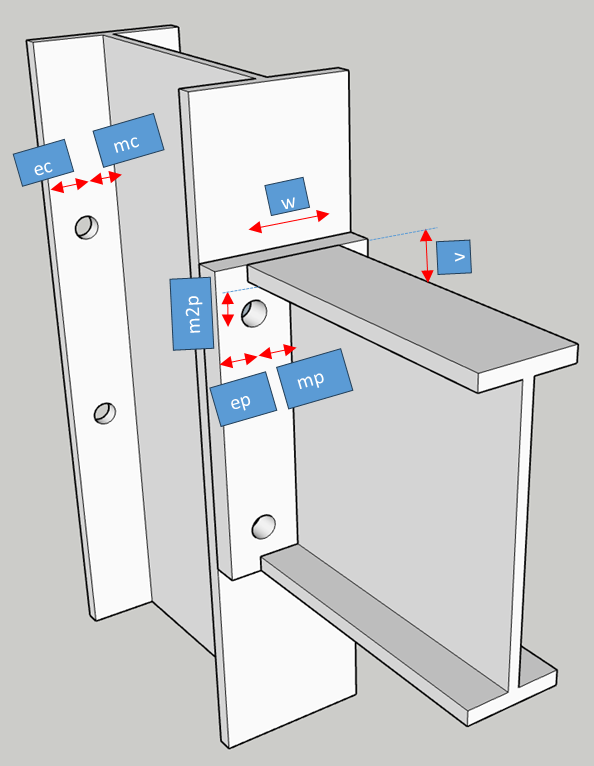

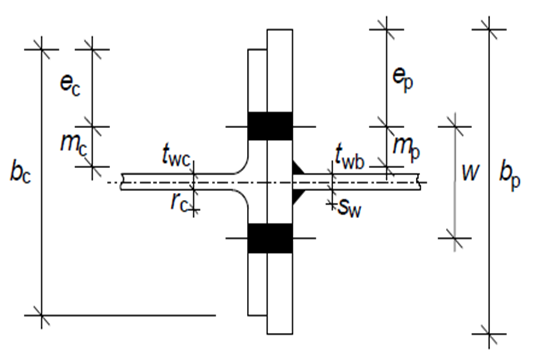

# D. Project:Connection Design according to EN 1993

## D.1. Variables ...............

In [206]:
# Bolt arrangement
mc = float(17.6)
ec = float(20)
mp = float(17.6)
ep = float(20)

# Material
fyk = float(235)          # N/mm2
fywc = float(235)         # N/mm2
E = float(210000)         # N/mm2
gamma0 = float(1)
gamma1 = float(1)
gamma2 = float(1.25)

tp = float(20)           # mm


# Bolts
fub = float(1000)         # N/mm2
Diam= float(16)           # mm
dw = float(30)             # mm     Washer


### Variables derived by the profile section(from IFC)

In [207]:
import funfile                                                                    # The name of the file containing the functions;
import importlib
importlib.reload(funfile)                                                         # Reload after changes
import math

In [208]:
b_c= funfile.lookUp(steelTable, ("b"), profileNameColumn)                # property from the profile section
print(b_c)

tw_c= funfile.lookUp(steelTable, ("tw"), profileNameColumn)              # property from the profile section, with function
print(tw_c)

tf_c= funfile.lookUp(steelTable, ("tf"), profileNameColumn)              # property from the profile section, with function
print(tf_c)

Avc = funfile.lookUp(steelTable, ("Avz"), profileNameColumn)              # property from the profile section, with function
print(Avc)

src = funfile.lookUp(steelTable, ("r"), profileNameColumn)              # property from the profile section, with function
print(src)


100
5.6
8.5
14
12


In [209]:
b_b = funfile.lookUp(steelTable, ("b"), profileNameBeam)                # property from the profile section
print(b_b)

tw_b = funfile.lookUp(steelTable, ("tw"), profileNameBeam)              # property from the profile section, with function
print(tw_b)

tf_b = funfile.lookUp(steelTable, ("tf"), profileNameBeam)              # property from the profile section, with function
print(tf_b)


135
6.6
10.2


## D.2. The functions of the component method

## D.2.2 T-stub components

### L eff beam side

In [210]:
L_eff_cpBeam = funfile.L_beam_cp(mp)                      # beam circular pattern
print(L_eff_cpBeam)

110.52800000000002


In [211]:
L_eff_ncpBeam = funfile.L_beam_ncp(mp)                      #beam non circular pattern
print(L_eff_ncpBeam)

97.856


In [212]:
L_eff_beam= min(L_eff_cpBeam,L_eff_ncpBeam)                      # Beam side min
print(L_eff_beam)                                        # mm

97.856


### Leff column side

In [213]:
L_eff_cp = funfile.L_column_cp(mc)                      # column circular pattern
print(L_eff_cp)

110.52800000000002


In [214]:
L_eff_ncp = funfile.L_column_ncp(mc,ec)
print(L_eff_ncp)


95.4


In [215]:
L_eff_column = min(L_eff_cp,L_eff_ncp)                      # column side min
print(L_eff_column)                                        # mm

95.4


## D.2.3 Column web panel 6.2.6.1

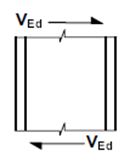

In [216]:
print(Avc)

14


In [217]:
Vwp_rd = 0.9*fywc*Avc*100/(gamma0*math.sqrt(3))
print(Vwp_rd, "N")
print(f"{Vwp_rd/1000:,.2f}","kN")                         # formatted

170953.41470704818 N
170.95 kN


## D.2.4 Column Web transverse compression 6.2.6.2

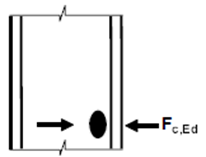

In [218]:
beff = tf_b + tp + 5*(tf_c+src)
#beff = tf_b
print(beff, "mm")

132.7 mm


In [219]:
omegapanel = 1/(math.sqrt(1+1.3*(beff*tw_c/(Avc*100))*(beff*tw_c/(Avc*100))))
print(omegapanel)

0.8555220750623367


In [220]:
kwc = 1
Fcwc_rd = (omegapanel*kwc*beff*tw_c*fywc/gamma0)

Fcwc_rd_max = (omegapanel*kwc*beff*tw_c*fywc/gamma1)

Fcwc_Rd = min(Fcwc_rd, Fcwc_rd_max)
#print(Fcwc_Rd)
print(f"{Fcwc_Rd/1000:,.2f}","kN")

149.40 kN


## D.2.5 Column Web in Transverse Tension acc. 6.2.6.3

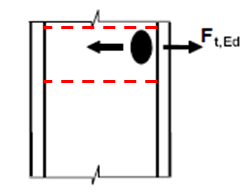

In [221]:
omegaInteract = 1/(math.sqrt(1+1.3*(beff*tw_c/(Avc*100))*(beff*tw_c/(Avc*100))))
print(omegaInteract)


0.8555220750623367


In [222]:
beff = L_eff_column
print(beff, "mm")

95.4 mm


In [223]:
Ftwc_rd = omegaInteract * L_eff_column * tw_c * fywc / gamma0
print(Ftwc_rd, "N")
print(f"{Ftwc_rd/1000:,.2f}","kN")

107407.71664460615 N
107.41 kN


## D.2.6 Column Flange Bending acc. 6.2.6.4

In [224]:
#Bolts
As = Diam*Diam *3.14/4
print(As)

Ftrd1bolt = 0.9*fub*As/(gamma2)
#print(Ftrd1bolt, "N")
print(f"{Ftrd1bolt/1000:,.2f}","kN")

200.96
144.69 kN


### D.2.6.1 Mode 1; yielding of the flange, column



In [225]:
# Mplrd1
leff1 = L_eff_cp                                   # circular pattern, column
Mplrd1 = 0.25*leff1*tf_c*tf_c*fyk/(gamma0)
print(Mplrd1, "N.m")
print(f"{Mplrd1/1000000:,.2f}","kN.m")

469156.82000000007 N.m
0.47 kN.m


In [226]:
n = min(ec, ep, (1.25*mc))
ew = dw/4

In [227]:
#                                            Mode 1 yielding of the plate
FtrdColumnM1 = (8*n-2*ew)*Mplrd1/(2*mc*n-(ew*(mc+n)))
#print(FtrdColumnM1, "N")
print(f"{FtrdColumnM1/1000:,.2f}","kN")

161.20 kN


### D.2.6.2 Mode 2; Bolt fracture + flange yielding,column

In [228]:
# Mplrd2
leff2 = L_eff_ncp                         # non circular pattern, column
Mplrd2 = 0.25*leff2*tf_c*tf_c*fyk/(gamma0)
#print(Mplrd2, "N.m")
print(f"{Mplrd2/1000000:,.2f}","kN.m")


0.40 kN.m


In [229]:
#                                            Mode 2
FtrdColumnM2 = (2*Mplrd2+(n*(2*Ftrd1bolt)))/(mc+n)
print(FtrdColumnM2, "N")
print(f"{FtrdColumnM2/1000:,.2f}","kN")

175466.33976063828 N
175.47 kN


In [230]:
#                                            Mode 3
FtrdColumnM3 = 2*Ftrd1bolt
print(FtrdColumnM3, "N")
print(f"{FtrdColumnM3/1000:,.2f}","kN")

289382.4 N
289.38 kN


In [231]:
FtrdColumn = min(FtrdColumnM1, FtrdColumnM2, FtrdColumnM3)
print(f"{FtrdColumn/1000:,.2f}","kN")

161.20 kN


## D.2.7 End plate bending acc. 6.2.6.5

In [232]:
#Bolts
print(f"{Ftrd1bolt/1000:,.2f}","kN")

144.69 kN


### D.2.7.1 Mode 1; yielding of the flange, beam plate

In [233]:
# Mplrd1
#leff1 = L_eff_cp
#print(leff1)                                    # circular pattern, beam
Mplrd1Beam = 0.25*(L_eff_beam)*tp*tp*fyk/(gamma0)
#print(Mplrd1Beam, "N.m")
print(f"{Mplrd1Beam/1000000:,.2f}","kN.m")

2.30 kN.m


In [234]:
nBeam = min(ec, ep, (1.25*mp))
print(nBeam)


20.0


In [235]:
#Ftrd, beam, Mode 1
FtrdBeamM1= (8*nBeam-2*ew)*Mplrd1Beam/(2*mp*nBeam-(ew)*(mp+nBeam))
print(f"{FtrdBeamM1/1000:,.2f}","kN")

790.15 kN


### D.2.7.2 Mode 2; Bolt fracture + flange yielding, beam plate

In [236]:
# Mplrd2, beam plate
leff2 = L_eff_ncpBeam                         # non circular pattern, beam
Mplrd2Beam = 0.25*leff2*tp*tp*fyk/(gamma0)
#print(Mplrd2Beam, "N.m")
print(f"{Mplrd2Beam/1000000:,.2f}","kN.m")

2.30 kN.m


In [237]:
# Ft2rd                                       Mode 2, beam plate
FtrdBeamM2 = (2*Mplrd2Beam+(nBeam*(2*Ftrd1bolt)))/(mp+nBeam)
print(f"{FtrdBeamM2/1000:,.2f}","kN")


276.25 kN


In [238]:
# Ft3rd
FtrdBeamM3 = 2*Ftrd1bolt
print(f"{FtrdBeamM3/1000:,.2f}","kN")

289.38 kN


In [239]:
FtrdBeam = min(FtrdBeamM1, FtrdBeamM2, FtrdBeamM3)
print(f"{FtrdBeam/1000:,.2f}","kN")

276.25 kN


## D.2.8 Beam_Flange_Comp acc. 6.2.6.7

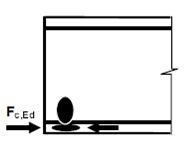

In [240]:
Wply= funfile.lookUp(steelTable, ("Wpl,y"), profileNameBeam)                # property from the profile section
print(Wply)

hb = funfile.lookUp(steelTable, ("h"), profileNameBeam)
print(hb)

print(tf_b)

484
270
10.2


In [241]:
Mcrd = Wply*fyk/gamma0
#print(Mcrd)
print(f"{Mcrd:,.2f}","kNm")
print(f"{Mcrd/1000000:,.2f}","Nmm")

113,740.00 kNm
0.11 Nmm


In [242]:
Fcfbrd = Mcrd*1000/(hb-tf_b)
print(f"{Fcfbrd/1000:,.2f}","kN")

437.80 kN


## D.2.9 Beam web tension acc. 6.2.6.8

In [243]:
print(L_eff_beam)
print(tw_b)


97.856
6.6


In [244]:
Ftwbrd = L_eff_beam*tw_b*fywc/gamma0
print(Ftwbrd/1000, "kN")

151.774656 kN


## D.2.10 Bolts shear and bearing

## D.3 Resisting Moment

### 6.2.6.1

In [245]:
F1 = Vwp_rd
print(f"{F1/1000:,.2f}","kN")

170.95 kN


### 6.2.6.2

In [246]:
F2 = Fcwc_Rd
print(f"{F2/1000:,.2f}","kN")

149.40 kN


### 6.2.6.3

In [247]:
F3 = Ftwc_rd
print(f"{F3/1000:,.2f}","kN")

107.41 kN


### 6.2.6.4

In [248]:
F4 = FtrdColumn
print(f"{F4/1000:,.2f}","kN")

161.20 kN


### 6.2.6.5

In [249]:
F5 = FtrdBeam
print(f"{F5/1000:,.2f}","kN")

276.25 kN


### 6.2.6.7

In [250]:
F7 = Fcfbrd
print(f"{F7:,.2f}","kN")

437,798.31 kN


### 6.2.6.8

In [251]:
F8 = Ftwbrd
print(f"{F8:,.2f}","kN")

151,774.66 kN


In [252]:
# lever arm zb
v = 25                    # mm
zb = hb-tf_b-v
print(zb)

234.8


In [253]:
# Resistance in tension
Ft = min(F3, F4, F5)
print(f"{Ft/1000:,.2f}","kN")

107.41 kN


In [254]:
# Resistance in compression
Fc = min(F1, F2, F7)
print(f"{Fc:,.2f}","kN")

149,402.56 kN


# Mrd

In [255]:
Mrd = Ft/1000*(zb/1000)
print(f"{Mrd:,.2f}","kNm")

25.22 kNm
